In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
data = pd.read_excel('superstore_sales.xlsx')

In [3]:
data.head(3) # إظهار أول ثلاثة سطور 

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


In [4]:
data.tail(3) # إظهار أخر ثلاثة سطور 

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
data.shape # شكل البيانات 

(51290, 21)

In [6]:
data.dtypes # النوع المخزن فيه كل عامود

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [7]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [8]:
data.isnull().sum() # هل يوجد عناصر مفقودة 

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
data.describe() # معلومات إحصائية عن البيانات 

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [10]:
data['order_date'].min() # تاريح أول شراء 

Timestamp('2011-01-01 00:00:00')

In [11]:
data['order_date'].max() # تاريخ أخر شراء 

Timestamp('2014-12-31 00:00:00')

In [12]:
# إنشاء عامود يدل على السنة و الشهر
data['month_year'] = data['order_date'].apply(lambda x: x.strftime('%Y-%m') )

In [13]:
data['month_year'] 

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [14]:
# معرفة كمية البيع في كل شهر 
data_trend = data.groupby('month_year').sum()['sales'].reset_index()

In [15]:
data_trend

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


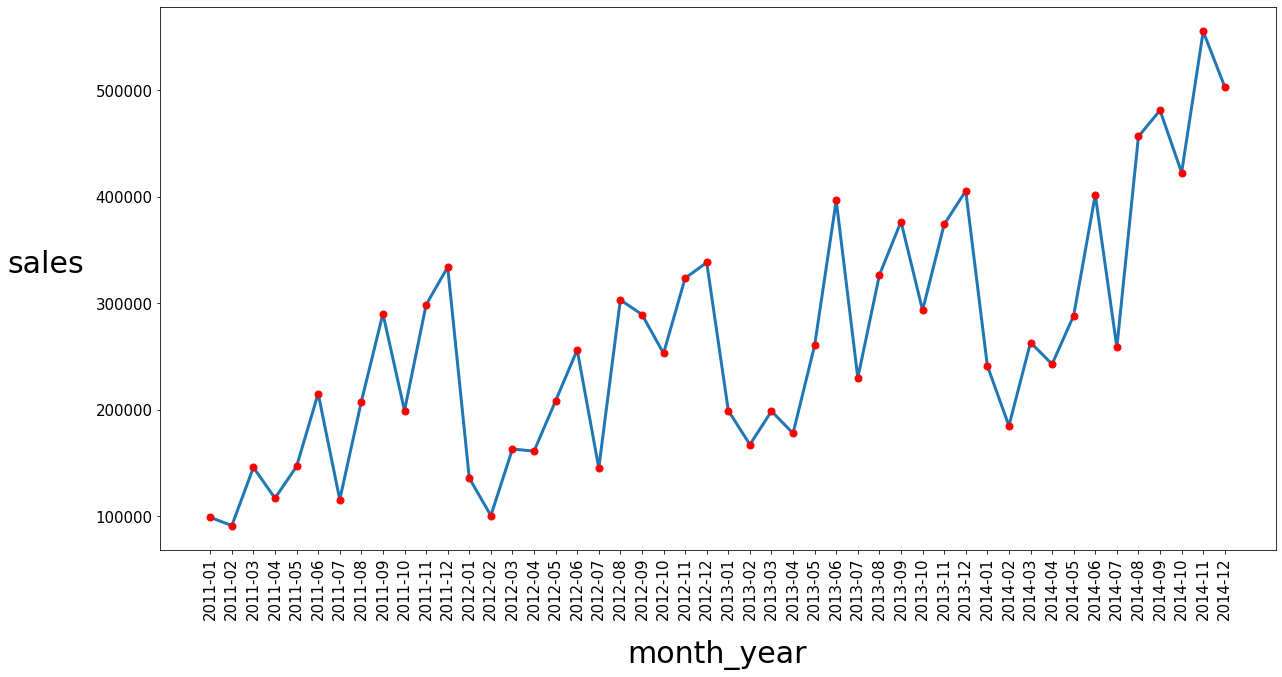

In [16]:
plt.figure(figsize=(20,10))
plt.plot(data_trend['month_year'],data_trend['sales'],marker='o',linewidth=3,markerfacecolor='r',
       markeredgecolor='r' , markersize = 7 )
plt.xticks(rotation = 90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('month_year',fontsize=30,labelpad=20)
plt.ylabel('sales',fontsize=30,labelpad=50,rotation=0)

plt.show()

In [17]:
data.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01


In [18]:
prod_sales = pd.DataFrame(data.groupby('product_name')['sales'].sum())

In [19]:
prod_sales.sort_values(by='sales',ascending=False).head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


In [20]:
prod_names = pd.DataFrame(data.groupby('product_name').sum()['quantity'])

In [21]:
prod_names.sort_values(by='quantity',ascending=False).head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


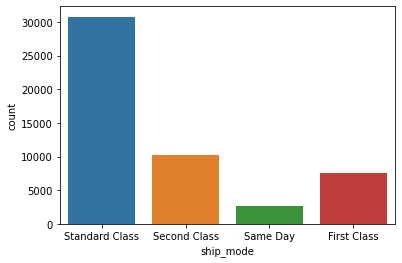

In [22]:
sns.countplot(data['ship_mode'])
plt.show()

In [23]:
pd.options.display.float_format = '{:.2f}'.format
cat_sup_fit = pd.DataFrame(data.groupby(['category','sub_category']).sum()['profit'])

In [24]:
cat_sup_fit.sort_values(by=['category','profit'],ascending = False)

profit
category        sub_category          
Technology      Copiers      258567.55
                Phones       216717.01
                Accessories  129626.31
                Machines      58867.87
Office Supplies Appliances   141680.59
                Storage      108461.49
                Binders       72449.85
                Paper         59207.68
                Art           57953.91
                Envelopes     29601.12
                Supplies      22583.26
                Labels        15010.51
                Fasteners     11525.42
Furniture       Bookcases    161924.42
                Chairs       141973.80
                Furnishings   46967.43
                Tables       -64083.39

In [25]:
df = data['country'].value_counts().head(10)
df 

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: country, dtype: int64

In [26]:
df = data.groupby('country')['sales'].sum().sort_values(ascending=False).head(10).to_frame()
df = df.reset_index()
df

,country,sales
0,United States,2297200.86
1,Australia,925235.85
2,France,858931.08
3,China,700562.03
4,Germany,628840.03
5,Mexico,622590.62
6,India,589650.10
7,United Kingdom,528576.30
8,Indonesia,404887.50
9,Brazil,361106.42


<AxesSubplot:xlabel='country', ylabel='sales'>

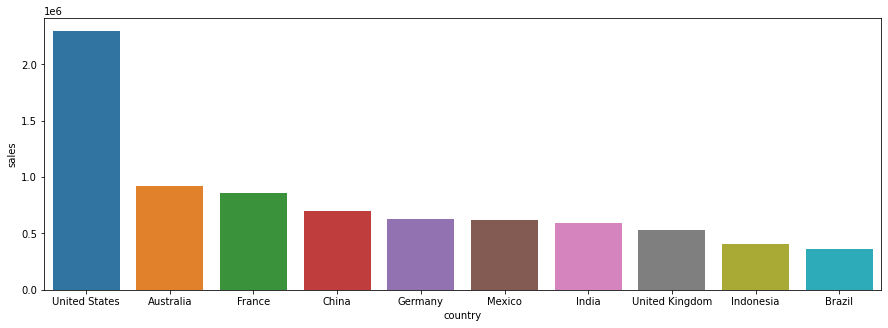

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['country'],y=df['sales'],estimator=np.mean,dodge=False)
